In [1]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('../Notebook/people.JPG')
image.shape

(1406, 2048, 3)

In [3]:
from ultralytics import RTDETR

# Load a COCO-pretrained RT-DETR-l model
model = RTDETR('rtdetr-l.pt')

# Display model information (optional)
model.info()

rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients


(673, 32970476, 0, 0)

In [4]:
from time import perf_counter

st = perf_counter()

# Run inference with the RT-DETR-l model on the 'bus.jpg' image
results = model('people.JPG')

print(perf_counter()-st)


image 1/1 C:\Users\TarunKumarChaubey\Documents\Learning\Notebook\people.JPG: 640x640 19 0s, 16 1s, 2 2s, 1 7, 3 13s, 1 16, 2 26s, 6 56s, 1 58, 1565.6ms
Speed: 7.7ms preprocess, 1565.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
6.559049299999998


In [5]:
conf = results[0].boxes.conf.numpy()
cls = results[0].boxes.cls.numpy()
bbox = results[0].boxes.xyxy.numpy()

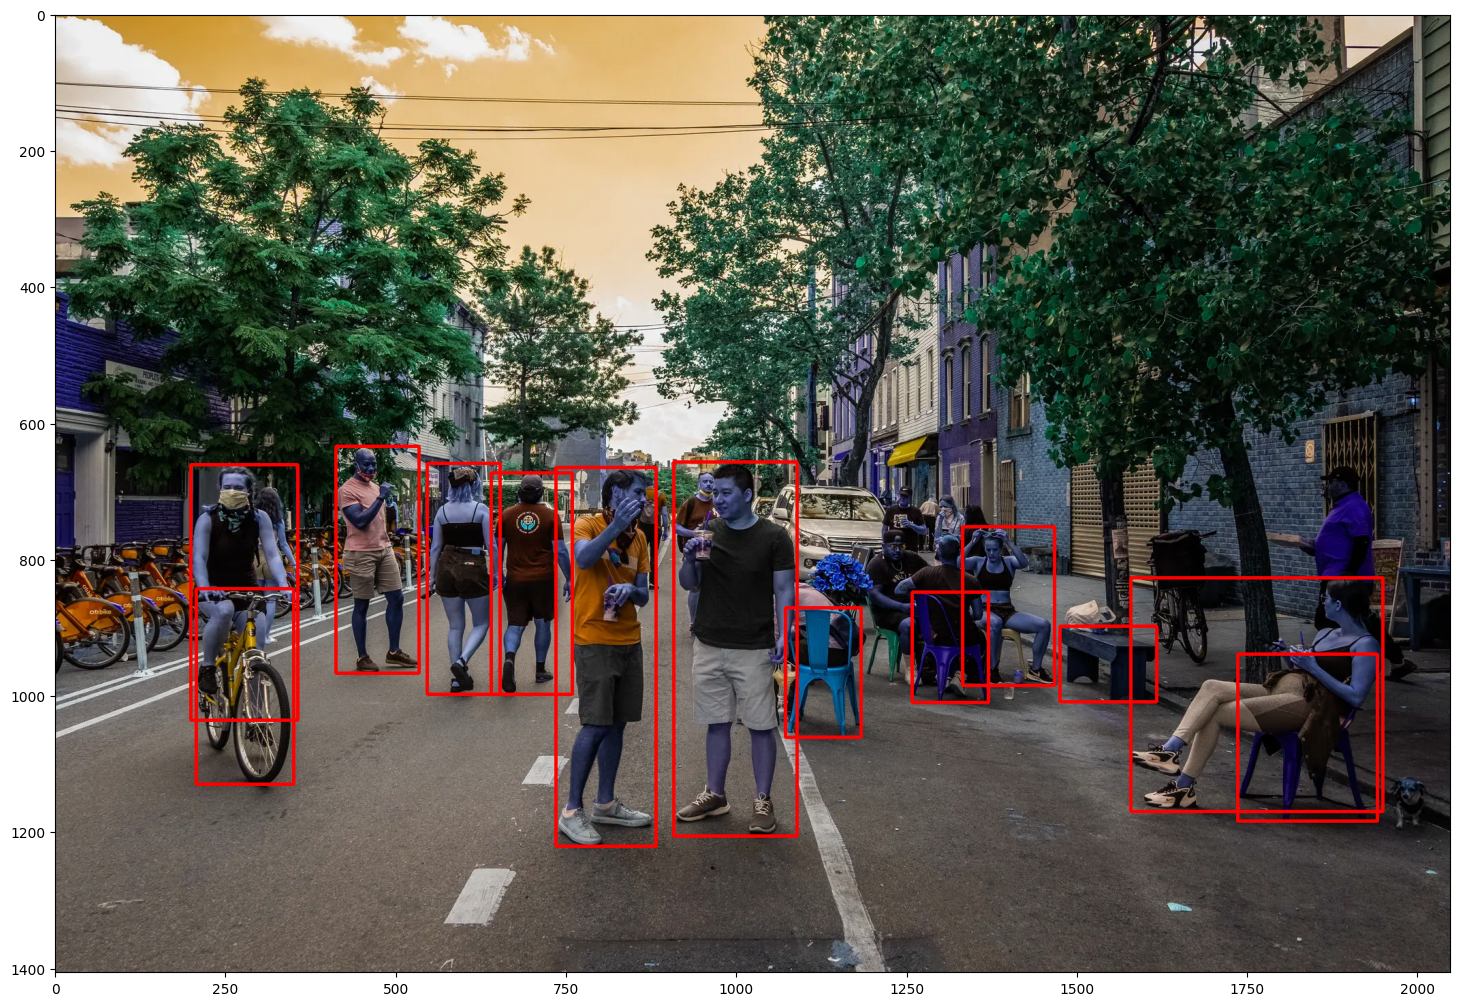

In [6]:
plt.rcParams['figure.figsize'] = (18,25)

image = cv2.imread('../Notebook/people.JPG')

for ind in range(len(bbox)):
    if conf[ind] > 0.80:
        box = np.array(bbox[ind],np.int16)
        image = cv2.rectangle(image,(box[0], box[1]), (box[2], box[3]), (255,0,0),3)
plt.imshow(image)

In [7]:
from ultralytics import FastSAM

In [ ]:
FastSAM